In [6]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', None)
import pandas_profiling
from datetime import datetime

In [7]:
player_dir = '/.../data/players/01_messi/'

## Merge ratings and match info(events)

In [8]:
ratings = pd.read_csv(player_dir + 'ratings_all.csv')
ratings

,matchid,rating
0,6730857,7.5
1,6744566,7.6
2,6789359,7.7
3,6807357,7.8
4,6807380,9.4
...,...,...
353,9594664,7.9
354,8524236,9.3
355,8524227,7.3
356,9594757,7.5


In [9]:
events = pd.read_csv(player_dir + 'events_all.csv').rename(columns={'id': 'matchid'})

events['startTimestamp'] = pd.to_datetime(events['startTimestamp'],unit='s')
events = events[events["status.code"] == 100]
events = events[['matchid','startTimestamp','tournament.name','tournament.uniqueTournament.slug','tournament.uniqueTournament.id','roundInfo.round','homeTeam.name','homeTeam.id','awayTeam.name','awayTeam.id','homeScore.normaltime', 'awayScore.normaltime']]
events['homeScore.normaltime']=events['homeScore.normaltime'].astype('int')
events['awayScore.normaltime']=events['awayScore.normaltime'].astype('int')
events

,matchid,startTimestamp,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime
0,5211184,2014-04-09 18:45:00,UEFA Champions League,uefa-champions-league,7,3,Atlético Madrid,2836,Barcelona,2817,1,0
1,4061231,2014-04-12 18:00:00,LaLiga,laliga,8,33,Granada,33779,Barcelona,2817,1,0
2,5062150,2014-04-16 19:30:00,Copa del Rey,copa-del-rey,329,1,Barcelona,2817,Real Madrid,2829,1,2
3,4061249,2014-04-20 19:00:00,LaLiga,laliga,8,34,Barcelona,2817,Athletic Club,2825,2,1
4,4061269,2014-04-27 19:00:00,LaLiga,laliga,8,35,Villarreal,2819,Barcelona,2817,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
475,9594664,2022-03-13 12:00:00,Ligue 1,ligue-1,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0
476,8524236,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,17,Argentina,4819,Venezuela,4722,3,0
477,8524227,2022-03-29 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,18,Ecuador,4757,Argentina,4819,1,1
478,9594757,2022-04-03 18:45:00,Ligue 1,ligue-1,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1


In [10]:
stats = pd.merge(ratings, events, on=['matchid'], how="inner")
stats

,matchid,rating,startTimestamp,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime
0,6730857,7.5,2015-05-12 18:45:00,UEFA Champions League,uefa-champions-league,7,2,Bayern München,2672,Barcelona,2817,3,2
1,6744566,7.6,2015-06-06 18:45:00,UEFA Champions League,uefa-champions-league,7,1,Juventus,2687,Barcelona,2817,1,3
2,6807357,7.8,2015-08-23 16:30:00,LaLiga,laliga,8,1,Athletic Club,2825,Barcelona,2817,0,1
3,6807380,9.4,2015-08-29 18:30:00,LaLiga,laliga,8,2,Barcelona,2817,Málaga,2830,1,0
4,6807400,8.6,2015-09-12 18:30:00,LaLiga,laliga,8,3,Atlético Madrid,2836,Barcelona,2817,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9594664,7.9,2022-03-13 12:00:00,Ligue 1,ligue-1,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0
347,8524236,9.3,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,17,Argentina,4819,Venezuela,4722,3,0
348,8524227,7.3,2022-03-29 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,18,Ecuador,4757,Argentina,4819,1,1
349,9594757,7.5,2022-04-03 18:45:00,Ligue 1,ligue-1,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1


## Find current team and group opponents' difficulty
https://www.transfermarkt.com/spieler-statistik/wertvollstemannschaften/marktwertetop

https://www.transfermarkt.com/statistik/weltrangliste/statistik/stat/plus/0/galerie/0?datum=2022-03-31

Accessed on 12/04/2022

In [17]:
# best clubs and national teams. Fixed for all players
top20clubs = ['Manchester City','Paris Saint-Germain', 'Liverpool', 'Chelsea', 'Bayern München', 'Manchester United', 'Real Madrid', 
            'Barcelona', 'Atlético Madrid', 'Tottenham', 'Borussia Dortmund', 'Juventus', 'Inter', 'Leicester City', 'Arsenal', 
            'Napoli', 'Milan', 'RB Leipzig', 'Everton', 'Bayer 04 Leverkusen']
top10nationalteams = ['Brazil', 'Belgium', 'France', 'Argentina', 'England', 'Italy', 'Spain', 'Portugal', 'Mexico', 'Netherlands', 
                    'Denmark', 'Germany', 'Uruguay', 'Switzerland', 'USA', 'Croatia', 'Colombia', 'Wales', 'Sweden', 'Senegal']

In [18]:
national_team = 'Argentina'
first_transfer = datetime(2021, 8, 10, 00, 00, 00)
transfers = [first_transfer]
teams = ['Barcelona', 'Paris Saint-Germain']

In [19]:
def find_opponent(time, hometeam, awayteam, transfers, national_team, teams, top20clubs, top10nationalteams):

    # find current team
    if time > transfers[0]:
        current_team = teams[1]
    else:
        current_team = teams[0]
    # ignore clubs and assign country as current team
    if ((national_team == hometeam) or (national_team == awayteam)):
        current_team = national_team
    # find opponent and fixture place
    if (hometeam == current_team or hometeam == national_team):
        opponent = awayteam
        home_fixture = 1
    else:
        opponent = hometeam
        home_fixture = 0
    # find current team value category
    if ((current_team in top20clubs) or (current_team in top10nationalteams)):
        current_team_category = 1
    else:
        current_team_category = 0
    # find opponent value category
    if ((opponent in top20clubs) or (opponent in top10nationalteams)):
        opponent_category = 1
    else:
        opponent_category = 0

    return current_team, opponent, opponent_category, current_team_category, home_fixture

stats['current_team'] = ''
stats['opponent'] = ''
stats['opponent_category']= 0
stats['current_team_category']= 0
stats['home_fixture']= 0

stats['current_team'], stats['opponent'], stats['opponent_category'], stats['current_team_category'], stats['home_fixture'] = \
    zip(*stats.apply(lambda row: find_opponent(row['startTimestamp'], row['homeTeam.name'], row['awayTeam.name'], \
        transfers, national_team, teams, top20clubs, top10nationalteams), axis=1))
stats

,matchid,rating,startTimestamp,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime,current_team,opponent,opponent_category,current_team_category,home_fixture
0,6730857,7.5,2015-05-12 18:45:00,UEFA Champions League,uefa-champions-league,7,2,Bayern München,2672,Barcelona,2817,3,2,Barcelona,Bayern München,1,1,0
1,6744566,7.6,2015-06-06 18:45:00,UEFA Champions League,uefa-champions-league,7,1,Juventus,2687,Barcelona,2817,1,3,Barcelona,Juventus,1,1,0
2,6807357,7.8,2015-08-23 16:30:00,LaLiga,laliga,8,1,Athletic Club,2825,Barcelona,2817,0,1,Barcelona,Athletic Club,0,1,0
3,6807380,9.4,2015-08-29 18:30:00,LaLiga,laliga,8,2,Barcelona,2817,Málaga,2830,1,0,Barcelona,Málaga,0,1,1
4,6807400,8.6,2015-09-12 18:30:00,LaLiga,laliga,8,3,Atlético Madrid,2836,Barcelona,2817,1,2,Barcelona,Atlético Madrid,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9594664,7.9,2022-03-13 12:00:00,Ligue 1,ligue-1,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0,Paris Saint-Germain,Bordeaux,0,1,1
347,8524236,9.3,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,17,Argentina,4819,Venezuela,4722,3,0,Argentina,Venezuela,0,1,1
348,8524227,7.3,2022-03-29 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,18,Ecuador,4757,Argentina,4819,1,1,Argentina,Ecuador,0,1,0
349,9594757,7.5,2022-04-03 18:45:00,Ligue 1,ligue-1,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1,Paris Saint-Germain,Lorient,0,1,1


## Intermediate Stats

In [20]:
import numpy as np

def find_rest_days(current_date, previous_date):
    # find rest days
    rest_days = np.NaN
    if previous_date is not pd.NaT:
        rest_days = pd.Timedelta(current_date.date()-previous_date.date()).days
    return rest_days

idx = 5
stats.insert(loc=idx, column='rest_days', value=0)
idx = 3
stats.insert(loc=idx, column='previous_date', value=stats['startTimestamp'].shift())

stats['rest_days'] = stats.apply(lambda row: find_rest_days(row['startTimestamp'], row['previous_date']), axis=1)
stats

,matchid,rating,startTimestamp,previous_date,tournament.name,tournament.uniqueTournament.slug,rest_days,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime,current_team,opponent,opponent_category,current_team_category,home_fixture
0,6730857,7.5,2015-05-12 18:45:00,NaT,UEFA Champions League,uefa-champions-league,NaN,7,2,Bayern München,2672,Barcelona,2817,3,2,Barcelona,Bayern München,1,1,0
1,6744566,7.6,2015-06-06 18:45:00,2015-05-12 18:45:00,UEFA Champions League,uefa-champions-league,25.0,7,1,Juventus,2687,Barcelona,2817,1,3,Barcelona,Juventus,1,1,0
2,6807357,7.8,2015-08-23 16:30:00,2015-06-06 18:45:00,LaLiga,laliga,78.0,8,1,Athletic Club,2825,Barcelona,2817,0,1,Barcelona,Athletic Club,0,1,0
3,6807380,9.4,2015-08-29 18:30:00,2015-08-23 16:30:00,LaLiga,laliga,6.0,8,2,Barcelona,2817,Málaga,2830,1,0,Barcelona,Málaga,0,1,1
4,6807400,8.6,2015-09-12 18:30:00,2015-08-29 18:30:00,LaLiga,laliga,14.0,8,3,Atlético Madrid,2836,Barcelona,2817,1,2,Barcelona,Atlético Madrid,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9594664,7.9,2022-03-13 12:00:00,2022-03-09 20:00:00,Ligue 1,ligue-1,4.0,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0,Paris Saint-Germain,Bordeaux,0,1,1
347,8524236,9.3,2022-03-25 23:30:00,2022-03-13 12:00:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,12.0,295,17,Argentina,4819,Venezuela,4722,3,0,Argentina,Venezuela,0,1,1
348,8524227,7.3,2022-03-29 23:30:00,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,4.0,295,18,Ecuador,4757,Argentina,4819,1,1,Argentina,Ecuador,0,1,0
349,9594757,7.5,2022-04-03 18:45:00,2022-03-29 23:30:00,Ligue 1,ligue-1,5.0,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1,Paris Saint-Germain,Lorient,0,1,1


##  Some manual additions, and then continue here

In [20]:
# idx = 6
# stats.insert(loc=idx, column='after_injury', value=0)
# idx = 7
# stats.insert(loc=idx, column='injury_days', value=0)
# idx = 8
# stats.insert(loc=idx, column='injury_type', value='')
# # stats
# stats.to_csv(player_dir + 'all_match_info.csv', index=False)
# # ------------------------------------------------------------------------
stats = pd.read_csv(player_dir + 'all_match_info.csv', parse_dates=['startTimestamp', 'player_birth'])
stats

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,age,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,form_last1,form_last3,form_last5,form_last10,form_last20,form_last30,season,matchid,startTimestamp,previous_date,tournament.name,tournament.uniqueTournament.slug,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,current_team,current_team_category,opponent,opponent_category,home_fixture,homeScore.normaltime,awayScore.normaltime,result,Performance
0,Messi,F,ARG,1987-06-24,Left,169,28.18,94,95,0,0,NaN,78,NaN,NaN,NaN,NaN,NaN,NaN,15-16,6807357,2015-08-23 16:30:00,2015-06-06 18:45:00,LaLiga,laliga,8,1,Athletic Club,2825,Barcelona,2817,Barcelona,1,Athletic Club,0,0,0,1,1,7.8
1,Messi,F,ARG,1987-06-24,Left,169,28.20,94,95,0,0,NaN,6,8.60,NaN,NaN,NaN,NaN,NaN,15-16,6807380,2015-08-29 18:30:00,2015-08-23 16:30:00,LaLiga,laliga,8,2,Barcelona,2817,Málaga,2830,Barcelona,1,Málaga,0,1,1,0,1,9.4
2,Messi,F,ARG,1987-06-24,Left,169,28.24,94,95,0,0,NaN,14,9.00,NaN,NaN,NaN,NaN,NaN,15-16,6807400,2015-09-12 18:30:00,2015-08-29 18:30:00,LaLiga,laliga,8,3,Atlético Madrid,2836,Barcelona,2817,Barcelona,1,Atlético Madrid,1,0,1,2,1,8.6
3,Messi,F,ARG,1987-06-24,Left,169,28.25,94,95,0,0,NaN,4,8.45,8.525,NaN,NaN,NaN,NaN,15-16,6874271,2015-09-16 18:45:00,2015-09-12 18:30:00,"UEFA Champions League, Group E",uefa-champions-league,7,1,Roma,2702,Barcelona,2817,Barcelona,1,Roma,0,0,1,1,2,8.3
4,Messi,F,ARG,1987-06-24,Left,169,28.26,94,95,0,0,NaN,4,9.15,9.075,NaN,NaN,NaN,NaN,15-16,6807468,2015-09-20 18:30:00,2015-09-16 18:45:00,LaLiga,laliga,8,4,Barcelona,2817,Levante,2849,Barcelona,1,Levante,0,1,4,1,1,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Messi,F,ARG,1987-06-24,Left,169,34.74,93,93,0,0,NaN,4,7.55,7.725,7.733333,7.727273,7.638095,7.725806,21-22,9594664,2022-03-13 12:00:00,2022-03-09 20:00:00,Ligue 1,ligue-1,34,28,Paris Saint-Germain,1644,Bordeaux,1645,Paris Saint-Germain,1,Bordeaux,0,1,3,0,1,7.9
345,Messi,F,ARG,1987-06-24,Left,169,34.78,93,93,1,6,Flu,12,8.60,7.875,8.050000,7.963636,7.761905,7.790323,21-22,8524236,2022-03-25 23:30:00,2022-03-13 12:00:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,17,Argentina,4819,Venezuela,4722,Argentina,1,Venezuela,0,1,3,0,1,9.3
346,Messi,F,ARG,1987-06-24,Left,169,34.79,93,93,0,0,NaN,4,8.30,7.925,7.916667,7.872727,7.795238,7.703226,21-22,8524227,2022-03-29 23:30:00,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",world-cup-qual-conmebol,295,18,Ecuador,4757,Argentina,4819,Argentina,1,Ecuador,0,0,1,1,2,7.3
347,Messi,F,ARG,1987-06-24,Left,169,34.80,93,93,0,0,NaN,5,7.40,8.000,7.716667,7.909091,7.828571,7.709677,21-22,9594757,2022-04-03 18:45:00,2022-03-29 23:30:00,Ligue 1,ligue-1,34,30,Paris Saint-Germain,1644,Lorient,1656,Paris Saint-Germain,1,Lorient,0,1,5,1,1,7.5


In [29]:
import numpy as np

def find_age(current_date, player_birth):
    age = pd.Timedelta(current_date.date()-player_birth.date()).days / 365
    return age

stats.insert(loc=11, column='age', value=0)

stats['age'] = stats.apply(lambda row: find_age(row['startTimestamp'], row['player_birth']), axis=1)
stats

,player_name,player_position,player_nationality,player_birth,player_foot,player_height,matchid,Performance,startTimestamp,previous_date,tournament.name,current_age,tournament.uniqueTournament.slug,season,fifa_rating,fifa_potential,after_injury,injury_days,injury_type,rest_days,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime,current_team,opponent,opponent_category,current_team_category,home_fixture,age
0,messi,F,ARG,1987-06-24,Left,169,6807357,7.8,2015-08-23 16:30:00,2015-06-06 18:45:00,LaLiga,28.183562,laliga,15-16,94,95,0,0,NaN,78,8,1,Athletic Club,2825,Barcelona,2817,0,1,Barcelona,Athletic Club,0,1,0,28.183562
1,messi,F,ARG,1987-06-24,Left,169,6807380,9.4,2015-08-29 18:30:00,2015-08-23 16:30:00,LaLiga,28.200000,laliga,15-16,94,95,0,0,NaN,6,8,2,Barcelona,2817,Málaga,2830,1,0,Barcelona,Málaga,0,1,1,28.200000
2,messi,F,ARG,1987-06-24,Left,169,6807400,8.6,2015-09-12 18:30:00,2015-08-29 18:30:00,LaLiga,28.238356,laliga,15-16,94,95,0,0,NaN,14,8,3,Atlético Madrid,2836,Barcelona,2817,1,2,Barcelona,Atlético Madrid,1,1,0,28.238356
3,messi,F,ARG,1987-06-24,Left,169,6874271,8.3,2015-09-16 18:45:00,2015-09-12 18:30:00,"UEFA Champions League, Group E",28.249315,uefa-champions-league,15-16,94,95,0,0,NaN,4,7,1,Roma,2702,Barcelona,2817,1,1,Barcelona,Roma,0,1,0,28.249315
4,messi,F,ARG,1987-06-24,Left,169,6807468,10.0,2015-09-20 18:30:00,2015-09-16 18:45:00,LaLiga,28.260274,laliga,15-16,94,95,0,0,NaN,4,8,4,Barcelona,2817,Levante,2849,4,1,Barcelona,Levante,0,1,1,28.260274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,messi,F,ARG,1987-06-24,Left,169,9594664,7.9,2022-03-13 12:00:00,2022-03-09 20:00:00,Ligue 1,34.742466,ligue-1,21-22,93,93,0,0,NaN,4,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0,Paris Saint-Germain,Bordeaux,0,1,1,34.742466
345,messi,F,ARG,1987-06-24,Left,169,8524236,9.3,2022-03-25 23:30:00,2022-03-13 12:00:00,"World Cup Qualification, CONMEBOL",34.775342,world-cup-qual-conmebol,21-22,93,93,1,6,Flu,12,295,17,Argentina,4819,Venezuela,4722,3,0,Argentina,Venezuela,0,1,1,34.775342
346,messi,F,ARG,1987-06-24,Left,169,8524227,7.3,2022-03-29 23:30:00,2022-03-25 23:30:00,"World Cup Qualification, CONMEBOL",34.786301,world-cup-qual-conmebol,21-22,93,93,0,0,NaN,4,295,18,Ecuador,4757,Argentina,4819,1,1,Argentina,Ecuador,0,1,0,34.786301
347,messi,F,ARG,1987-06-24,Left,169,9594757,7.5,2022-04-03 18:45:00,2022-03-29 23:30:00,Ligue 1,34.800000,ligue-1,21-22,93,93,0,0,NaN,5,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1,Paris Saint-Germain,Lorient,0,1,1,34.800000


## Hold only league matches

In [25]:
# premier-league=fa-cup=efl-cup=championship=1, laliga=laliga-2=copa-del-rey=supercopa-de-espana=32, ligue-1=ligue-2=coupe-de-la-ligue=coupe-de-france=7,  
# serie-a=serie-b=coppa-italia=supercoppa-italiana=31, bundesliga=dfb-pokal=super-cup=30,
# eliteserien(norway)=5, bundesliga(austria)=17, eredivisie=35, liga-profesional-de-futbol(argentina)=48, brasileiro-serie-a=13
# primeira-liga=segunda-liga=taca-da-liga=44, super-league=greece-cup=67, super-league(swiss)=25

# world-cup-qual-uefa=uefa-champions-league=uefa-europa-league=european-championship-qualification=european-championship=uefa-youth-league=u19-european-championship=u21-euro-qualification=u17-european-championship=uefa-nations-league=1465
# world-cup-qual-conmebol=conmebol-libertadores=copa-america=conmebol-sudamericana=1470
# world-cup=club-world-cup=olympic-games=confederations-cup=int-friendly-games=u21-friendly-games=u20-world-cup=international-champions-cup=u17-world-cup=club-friendly-games=emirates-cup=1468
# world-cup-qual-afc=1467
# africa-cup-of-nations=world-cup-qual-caf=1466
# mls-all-star-game=26

# league_ids = [1, 32, 7, 31, 30, 5, 17, 35, 48, 13, 44, 67]

# forgot championship for mason mount, super lig for kjaer, laliga2 for pedri

In [26]:
league_names = ['premier-league', 'laliga','ligue-1','serie-a','bundesliga','eliteserien','eredivisie','liga-profesional-de-futbol','brasileiro-serie-a','primeira-liga','super-league', 'Süper Lig', 'LaLiga 2']

stats=stats[stats['tournament.uniqueTournament.slug'].isin(league_names)]
stats.reset_index(drop=False, inplace=True)
stats

,startTimestamp,matchid,rating,previous_date,tournament.name,tournament.uniqueTournament.slug,after_injury,injury_days,injury_type,rest_days,tournament.uniqueTournament.id,roundInfo.round,homeTeam.name,homeTeam.id,awayTeam.name,awayTeam.id,homeScore.normaltime,awayScore.normaltime,current_team,opponent,opponent_category,current_team_category,home_fixture
0,2015-08-23 16:30:00,6807357,7.8,2015-06-06 18:45:00,LaLiga,laliga,0,0,NaN,78.0,8,1,Athletic Club,2825,Barcelona,2817,0,1,Barcelona,Athletic Club,0,1,0
1,2015-08-29 18:30:00,6807380,9.4,2015-08-23 16:30:00,LaLiga,laliga,0,0,NaN,6.0,8,2,Barcelona,2817,Málaga,2830,1,0,Barcelona,Málaga,0,1,1
2,2015-09-12 18:30:00,6807400,8.6,2015-08-29 18:30:00,LaLiga,laliga,0,0,NaN,14.0,8,3,Atlético Madrid,2836,Barcelona,2817,1,2,Barcelona,Atlético Madrid,1,1,0
3,2015-09-20 18:30:00,6807468,10.0,2015-09-16 18:45:00,LaLiga,laliga,0,0,NaN,4.0,8,4,Barcelona,2817,Levante,2849,4,1,Barcelona,Levante,0,1,1
4,2015-09-23 18:00:00,6807391,9.1,2015-09-20 18:30:00,LaLiga,laliga,0,0,NaN,3.0,8,5,Celta Vigo,2821,Barcelona,2817,4,1,Barcelona,Celta Vigo,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2022-02-26 20:00:00,9594702,8.7,2022-02-19 20:00:00,Ligue 1,ligue-1,0,0,NaN,7.0,34,26,Paris Saint-Germain,1644,Saint-Étienne,1678,3,1,Paris Saint-Germain,Saint-Étienne,0,1,1
221,2022-03-05 20:00:00,9594656,7.1,2022-02-26 20:00:00,Ligue 1,ligue-1,0,0,NaN,7.0,34,27,OGC Nice,1661,Paris Saint-Germain,1644,1,0,Paris Saint-Germain,OGC Nice,0,1,0
222,2022-03-13 12:00:00,9594664,7.9,2022-03-09 20:00:00,Ligue 1,ligue-1,0,0,NaN,4.0,34,28,Paris Saint-Germain,1644,Bordeaux,1645,3,0,Paris Saint-Germain,Bordeaux,0,1,1
223,2022-04-03 18:45:00,9594757,7.5,2022-03-29 23:30:00,Ligue 1,ligue-1,0,0,NaN,5.0,34,30,Paris Saint-Germain,1644,Lorient,1656,5,1,Paris Saint-Germain,Lorient,0,1,1


<AxesSubplot:xlabel='startTimestamp'>

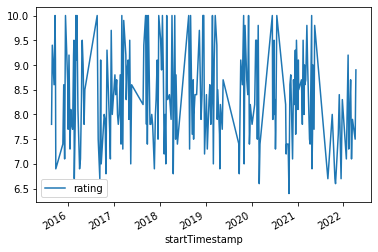

In [27]:
stats.plot('startTimestamp', 'rating')

In [28]:
stats.to_csv(player_dir + 'match_info.csv', index=False)